<a href="https://colab.research.google.com/github/mdpw/msc-ai-cw/blob/main/full_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [119]:
# 1. Load the dataset
file_path = "https://raw.githubusercontent.com/mdpw/msc-ai-cw/main/dataset/cinnamon_quality_dataset.csv"  # Use raw content URL
df = pd.read_csv(file_path)

In [120]:
# 2. Basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (1260, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sample_ID               1260 non-null   object 
 1   Moisture (%)            1260 non-null   float64
 2   Ash (%)                 1260 non-null   float64
 3   Volatile_Oil (%)        1260 non-null   float64
 4   Acid_Insoluble_Ash (%)  1260 non-null   float64
 5   Chromium (mg/kg)        1260 non-null   float64
 6   Coumarin (mg/kg)        1260 non-null   float64
 7   Quality_Label           1260 non-null   object 
dtypes: float64(6), object(2)
memory usage: 78.9+ KB
None

First 5 rows:
  Sample_ID  Moisture (%)   Ash (%)  Volatile_Oil (%)  Acid_Insoluble_Ash (%)  \
0      H018     10.789005  5.572559          1.259205                0.209963   
1      L009     13.923084  7.043669          0.690446                0.739094   
2      H

In [121]:
# 3. Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Moisture (%)      Ash (%)  Volatile_Oil (%)  Acid_Insoluble_Ash (%)  \
count   1260.000000  1260.000000       1260.000000             1260.000000   
mean      11.887224     6.522170          1.051225                0.451606   
std        1.169604     0.628862          0.272911                0.157070   
min       10.021690     5.520874          0.606326                0.197697   
25%       11.017503     5.978487          0.771195                0.348661   
50%       11.638028     6.486592          1.082036                0.430228   
75%       12.733444     7.161447          1.260000                0.552217   
max       13.973884     7.496544          1.493286                0.794266   

       Chromium (mg/kg)  Coumarin (mg/kg)  
count       1260.000000       1260.000000  
mean           0.002207          0.008836  
std            0.000744          0.004919  
min            0.000993          0.002077  
25%            0.001601          0.004400  
50%     

In [122]:
# 4. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Sample_ID                 0
Moisture (%)              0
Ash (%)                   0
Volatile_Oil (%)          0
Acid_Insoluble_Ash (%)    0
Chromium (mg/kg)          0
Coumarin (mg/kg)          0
Quality_Label             0
dtype: int64


In [123]:
# Remove text after first space in column names
df.columns = [col.split(' ')[0] for col in df.columns]


Target Distribution:
Quality_Label
High      420
Low       420
Medium    420
Name: count, dtype: int64


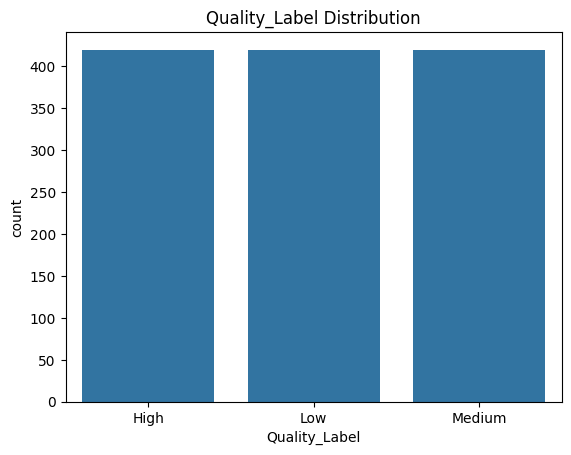

In [124]:
# 5. Class distribution (Quality_Label)
print("\nTarget Distribution:")
print(df['Quality_Label'].value_counts())
sns.countplot(x='Quality_Label', data=df)
plt.title('Quality_Label Distribution')
plt.show()

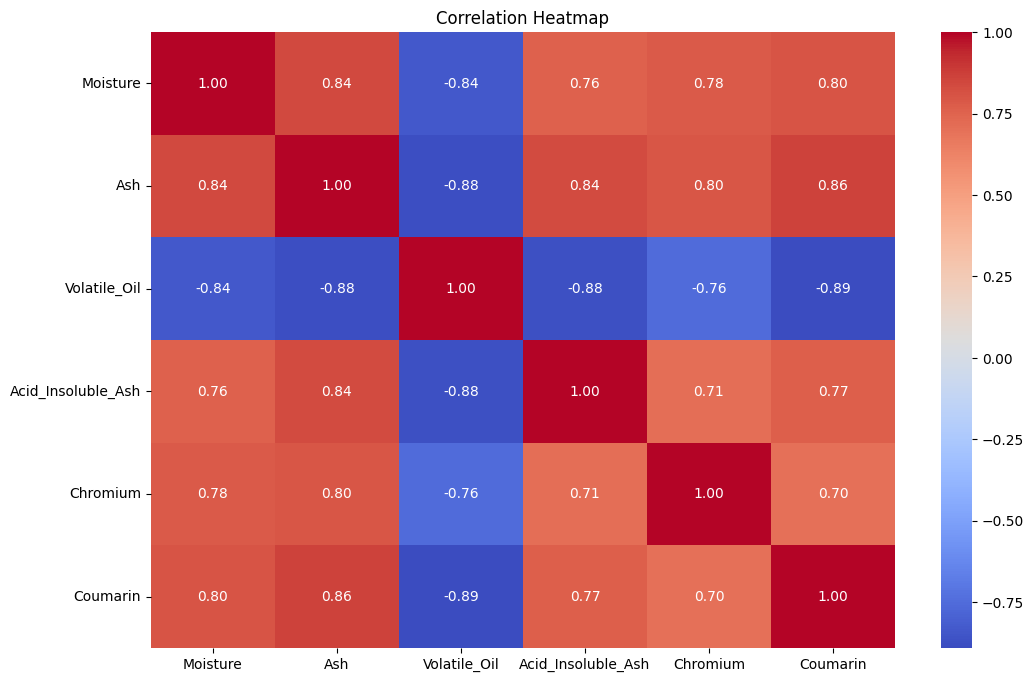

In [125]:
# 6. Correlation Matrix (Numerical Features Only)
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Plot Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

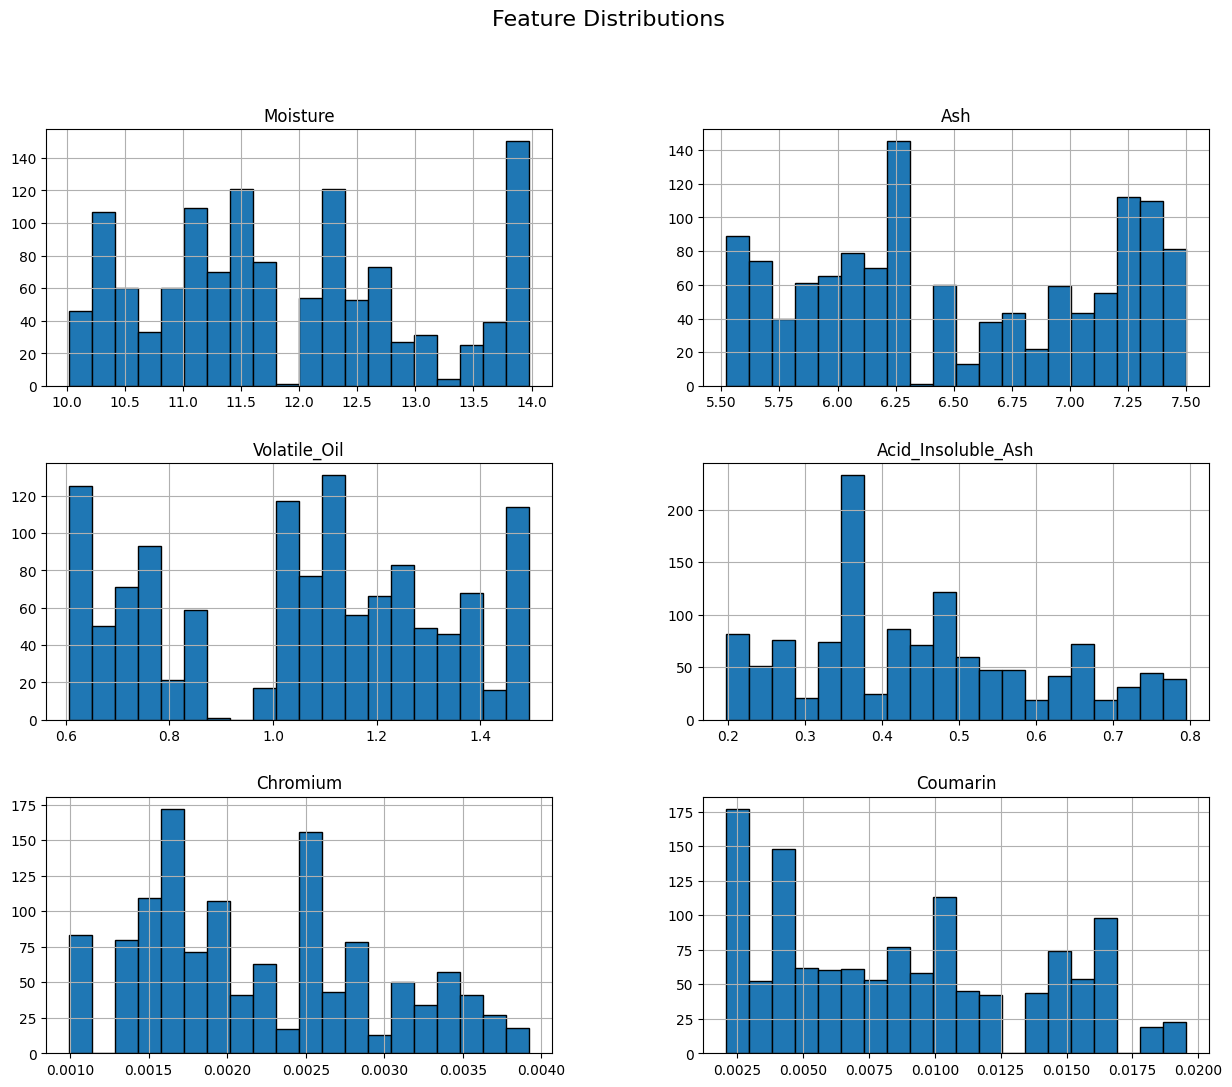

In [126]:
# 7. Distribution of each numerical feature
numeric_cols = numeric_df.columns
df[numeric_cols].hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

In [127]:
# 8. Pairplot (optional - can be slow for large datasets)
#sns.pairplot(df[numeric_cols[:5].to_list() + ['IsDefective']], hue='IsDefective')
#plt.show()


In [128]:
# 9. Outlier detection (Boxplots)
#for col in numeric_cols:
#    plt.figure(figsize=(6, 4))
#    sns.boxplot(data=df, x='IsDefective', y=col)
#    plt.title(f'Boxplot of {col} by IsDefective')
#    plt.show()

In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from torch.utils.data import Dataset, DataLoader
import torch
from torch.utils.data import TensorDataset, DataLoader

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50 | Train Loss: 0.8276, Train Acc: 0.7037 | Val Loss: 0.5547, Val Acc: 0.8095
Epoch 2/50 | Train Loss: 0.4639, Train Acc: 0.8016 | Val Loss: 0.3403, Val Acc: 0.8770
Epoch 3/50 | Train Loss: 0.2846, Train Acc: 0.9233 | Val Loss: 0.1896, Val Acc: 0.9722
Epoch 4/50 | Train Loss: 0.1579, Train Acc: 0.9788 | Val Loss: 0.1008, Val Acc: 0.9722
Epoch 5/50 | Train Loss: 0.0970, Train Acc: 0.9868 | Val Loss: 0.0688, Val Acc: 0.9722
Epoch 6/50 | Train Loss: 0.0519, Train Acc: 0.9960 | Val Loss: 0.0385, Val Acc: 1.0000
Epoch 7/50 | Train Loss: 0.0486, Train Acc: 0.9894 | Val Loss: 0.0361, Val Acc: 0.9722
Epoch 8/50 | Train Loss: 0.0281, Train Acc: 0.9987 | Val Loss: 0.0188, Val Acc: 1.0000
Epoch 9/50 | Train Loss: 0.0248, Train Acc: 0.9974 | Val Loss: 0.0165, Val Acc: 1.0000
Epoch 10/50 | Train Loss: 0.0175, Train Acc: 1.0000 | Val Loss: 0.0147, Val Acc: 1.0000
Epoch 11/50 | Train Loss: 0.0148, Train Acc: 0.9960 | Val Loss: 0.0118, Val Acc: 1.0000
Epoch 12/50 | Train Loss: 0.0133, Train A

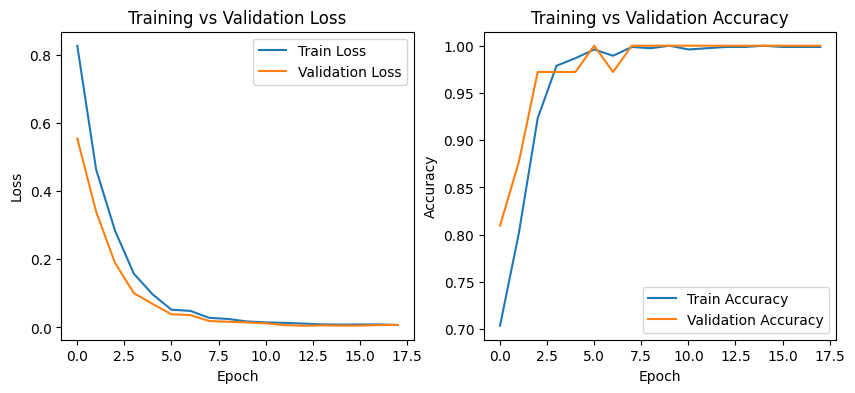

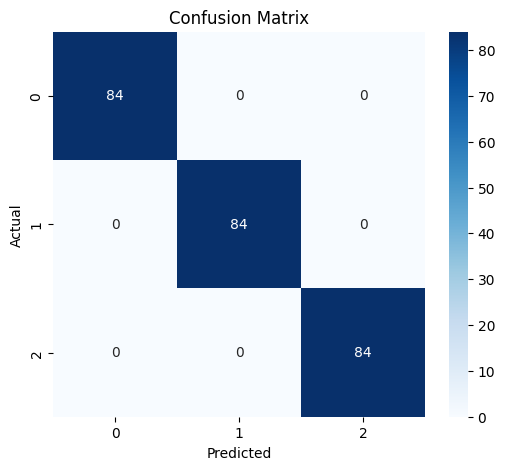

Classification Report:

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        84
         Low       1.00      1.00      1.00        84
      Medium       1.00      1.00      1.00        84

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252

Overlap between train and test (data leakage check): False


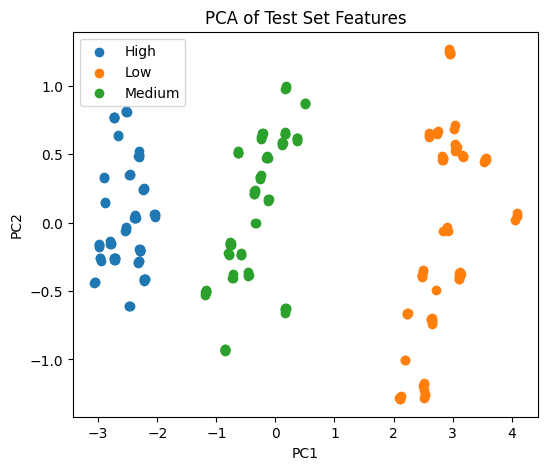

In [130]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Data Preparation ---
df = df.drop(columns=['Sample_ID'])
X = df.drop(columns=['Quality_Label'])
y = df['Quality_Label']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train_enc, dtype=torch.long)
y_val_tensor = torch.tensor(y_val_enc, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_enc, dtype=torch.long)

batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)

# --- 2. ANN Model with Dropout ---
input_size = X_train_tensor.shape[1]
hidden_size = 64
output_size = len(le.classes_)

class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

model = ANN()

# --- 3. Loss, Optimizer, Scheduler ---
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# --- 4. Training loop with Early Stopping and metric storage ---
num_epochs = 50
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

best_val_loss = float('inf')
patience = 5
counter = 0

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Scheduler step
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Load best model
model.load_state_dict(torch.load("best_model.pth"))

# --- 5. Plot Loss & Accuracy curves ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

# --- 6. Test Evaluation ---
y_test_pred = []
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_test_pred.extend(predicted.tolist())

# Confusion Matrix
cm = confusion_matrix(y_test_enc, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test_enc, y_test_pred, target_names=le.classes_))

# Data leakage check
train_rows = X_train_tensor.numpy()
test_rows = X_test_tensor.numpy()
overlap = np.any(np.all(np.isin(test_rows[:, None], train_rows), axis=2))
print("Overlap between train and test (data leakage check):", overlap)

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)
plt.figure(figsize=(6,5))
for label in np.unique(y_test_enc):
    plt.scatter(X_pca[y_test_enc==label,0], X_pca[y_test_enc==label,1], label=le.classes_[label])
plt.legend()
plt.title("PCA of Test Set Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
